In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


pd.options.display.max_columns = None
pd.options.display.max_rows = 100


df = pd.read_csv('Data/kc_house_data.csv').dropna()

FileNotFoundError: [Errno 2] File Data/kc_house_data.csv does not exist: 'Data/kc_house_data.csv'

In [2]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,4,7,860,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000
13,6054650070,10/7/2014,400000.0,3,1.75,1370,9680,1.0,0.0,0.0,4,7,1370,0.0,1977,0.0,98074,47.6127,-122.045,1370,10208
14,1175000570,3/12/2015,530000.0,5,2.00,1810,4850,1.5,0.0,0.0,3,7,1810,0.0,1900,0.0,98107,47.6700,-122.394,1360,4850


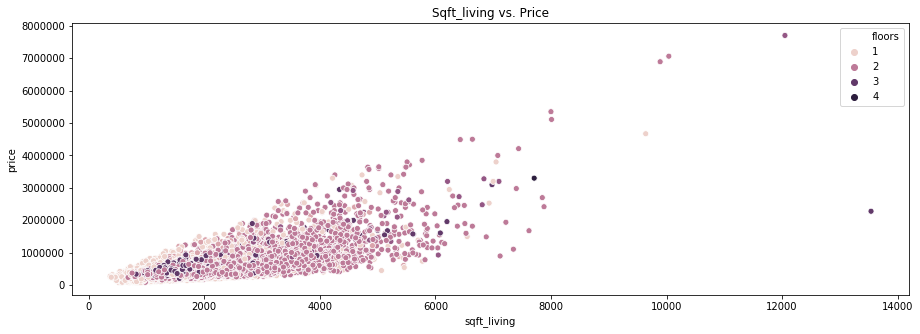

In [24]:
def plot_scatter(df, x,y, h = None): 
    plt.figure(figsize = (15,5))
    plt.title(f'{x.capitalize()} vs. {y.capitalize()}')
    sns.scatterplot(x=x, y=y, data=df, hue = h)

#plot_scatter(df, 'sqft_lot', 'price', h = 'floors')
plot_scatter(df, 'sqft_living', 'price', h = 'floors')

Text(0.5, 0, 'Bedrooms')

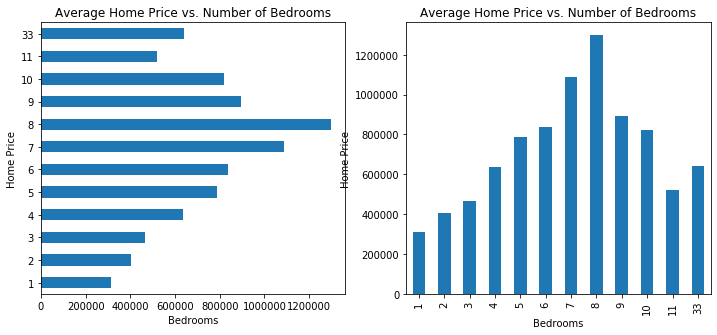

In [4]:
# Bedrooms vs. average home price
figure, ax = plt.subplots(1,2, figsize = (12,5))
bedroom_price = df.groupby('bedrooms')['price'].mean()
bedroom_price.plot.barh(ax = ax[0])
ax[0].set_title('Average Home Price vs. Number of Bedrooms')
ax[0].set_ylabel('Home Price'); ax[0].set_xlabel('Bedrooms')

bedroom_price = df.groupby('bedrooms')['price'].mean()
bedroom_price.plot.bar(ax = ax[1])
ax[1].set_title('Average Home Price vs. Number of Bedrooms')
ax[1].set_ylabel('Home Price'); ax[1].set_xlabel('Bedrooms')

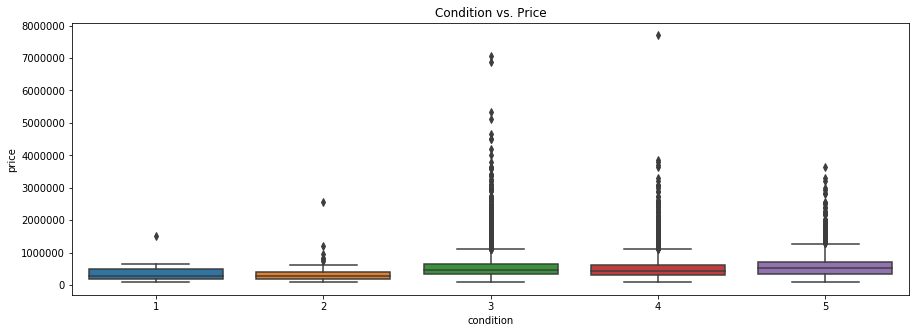

In [21]:
def plot_box(df, x,y): 
    plt.figure(figsize = (15,5))
    plt.title(f'{x.capitalize()} vs. {y.capitalize()}')
    sns.boxplot(x=x, y=y, data=df)

#plot_box(df, 'waterfront', 'price')
#plot_box(df,'floors', 'price')
plot_box(df, 'condition', 'price')



### Approaches for Predictions

- Knearest Neighbors (lat- long)
- Multiple Regression
- Folium
- 4 variables for the regression

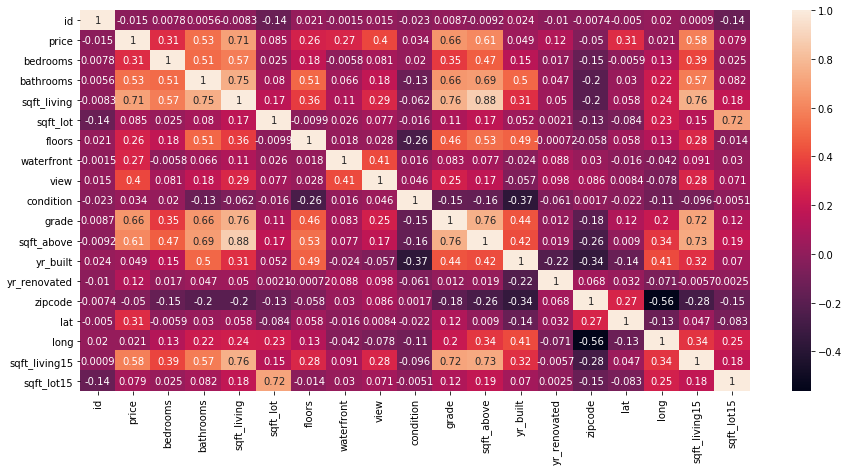

In [18]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot = True)

Correlation over .5 --> bathrooms, sqft_living, grade, sqft_above, sqft_living15